In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# path to yield data
yldpath = '/Users/demetrayancopoulos/Desktop/SML310/final_project/gro_ylds/wheatf_mn_ia.xlsx'

# path to all final input data
featdir = '/Users/demetrayancopoulos/Desktop/SML310/final_project/era5/final_input_data/'

# path to all the data files
fname1 = 'monthly_avg_temp.xlsx'
fname2 = 'monthly_max_t2m.xlsx'
fname3 = 'monthly_min_t2m.xlsx'
fname4 = 'monthly_precip_rate.xlsx'
fname5 = 'monthly_uv_mean.xlsx'
fname6 = 'monthly_uv_max.xlsx'
fname7 = 'monthly_uv_min.xlsx'
fname8 = 'monthly_avgt2m_anom.xlsx'
fname9 = 'monthly_maxt2m_anom.xlsx'
fname10 = 'monthly_mint2m_anom.xlsx'
fname11 = 'monthly_precipr_anom.xlsx'
fname12 = 'monthly_uvmean_anom.xlsx'
fname13 = 'monthly_uvmax_anom.xlsx'
fname14 = 'monthly_uv_min_anom.xlsx'
fname15 = 'monthly_rh_mean.xlsx'
fname16 = 'monthly_rh_mean_anom.xlsx'

In [3]:
def yld_pairplot(yldpath, featpath):
    # INPUTS
    #
    # yldpath: str, path to file being used for yield data (target variable)
    # featpath: str, path to file being used for features
    
    # get annual wheat yield data
    y = pd.read_excel(yldpath)
    
    # read in independent variable (features) data
    df = pd.read_excel(featpath)
    
    # normalize all features (so that each feature has equal weight in model)
    df = (df-df.min())/(df.max()-df.min())
    
    # add yields to features dataframe
    df['yld'] = y['Value']
    
    # generate pairplot to visualize disease progression plotted against all features
    sns.pairplot(df, x_vars=df.columns, y_vars=['yld'])
    


# Inspect yield vs normalized absolute data

## Visualize yield plotted against mean monthly temp

monthly_avg_temp.xlsx


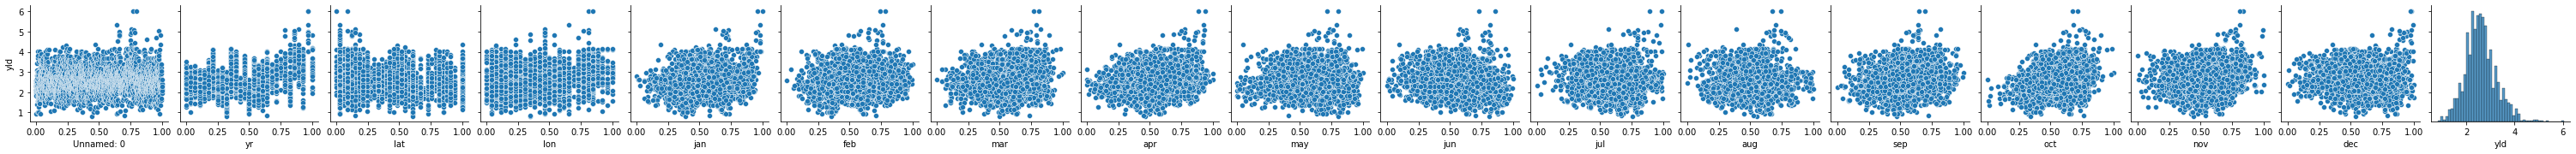

In [4]:
fname = fname1

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- Almost all of the mean monthly temperatures seem to have the same relationship to the yields; I expect that there is multicollinearity for several months' mean temperature.
- The relationship between mean monthly temperatures and yield is not very distinct for most of the plots. It seems relatively random except for the highest yields, which all coincide with relatively high mean monthly temperatures. 
- The month with the most significant relationship to yields seems to be october. As mean monthly temperature in october increases, yield increases. 

## Visualize yield plotted against max monthly temp

monthly_max_t2m.xlsx


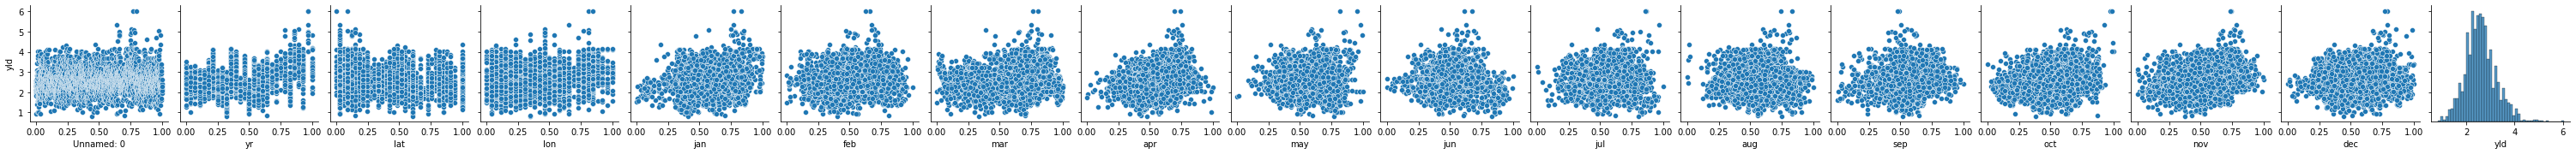

In [5]:
fname = fname2

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- Similar to mean monthly temp, higher max monthly temps tend to be associated with higher yields. Again, I suspect that there is multicollinearity across many of these features.
- Visually, jan max monthly temp seems to have the most distinct relationship with yields. Apr, may, oct, nov, dec also show a similar relationship.

## Visualize yield plotted against min monthly temp

monthly_min_t2m.xlsx


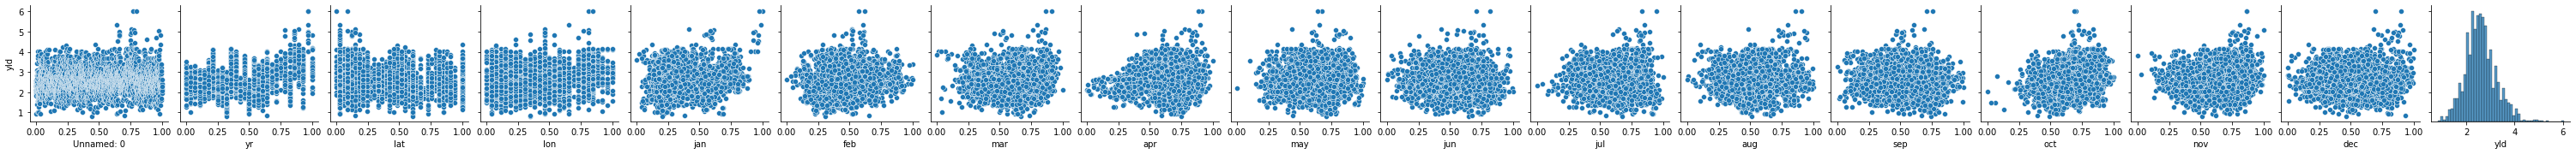

In [6]:
fname = fname3

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- I am not convinced that any of these datasets have a significant relationship to the yield. There does seem to be a slight positive correlation between min monthly temp and yields, but these datasets are even messier than mean and max monthly temp. 
- Apr and oct could potentially be useful in predicting yields.

## Visualize yield plotted against monthly mean total precipitation rate

monthly_precip_rate.xlsx


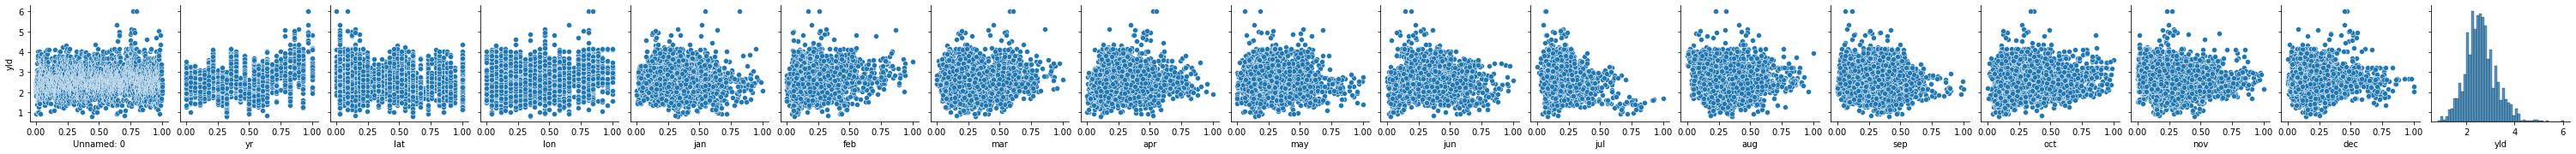

In [7]:
fname = fname4

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- There is not a consistent trend across all months between monthly mean total precipitation and yield. 
- It is interesting to note that in several months (ex: jul, sep, nov) there is a much larger range of yields at lower monthly mean total precipitation than at higher monthly mean total precipitation. It is hard to tell whether this is a sample bias (ie. fewer samples at higher monthly precip), or a legitimate physical phenomenon. Physically, it could mean that: 
    - when total precipitation is low either 
         - precipitation is not the main control on yields (ie. other parameters  contributing to yield are able to induce larger fluctuations in yield), or 
         - crops are more sensitive to the amount of precipitation
    - when precipitation is high either 
         - precipitation is the main control on yields (ie. other parameters contributing to yields are not able to induce large fluctuations in yield), or 
         - crops are less sensitive to the amount of precipitation

## Visualize yield plotted against monthly mean msdwuvrf (mean surface downward uv radiation flux)

monthly_uv_mean.xlsx


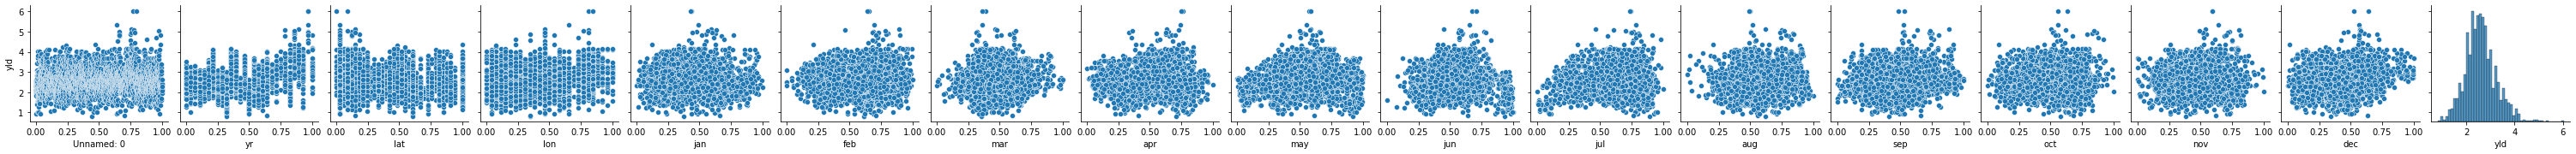

In [8]:
fname = fname5

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- In late spring to summer (apr may, jun, jul) there is a very subtle curvature in the plots. This suggests that there is an intermediary value of uv flux that is optimal for plant growth. Although this isn't too surprising (too little sunlight will limit photosynthesis, too much might cause a plant to overheat/dry out), it's super exciting and interesting to actually see!!
- In dec, there appears to be a positive correlation between mean uv flux and yield.

## Visualize yield plotted against monthly max msdwuvrf

monthly_uv_max.xlsx


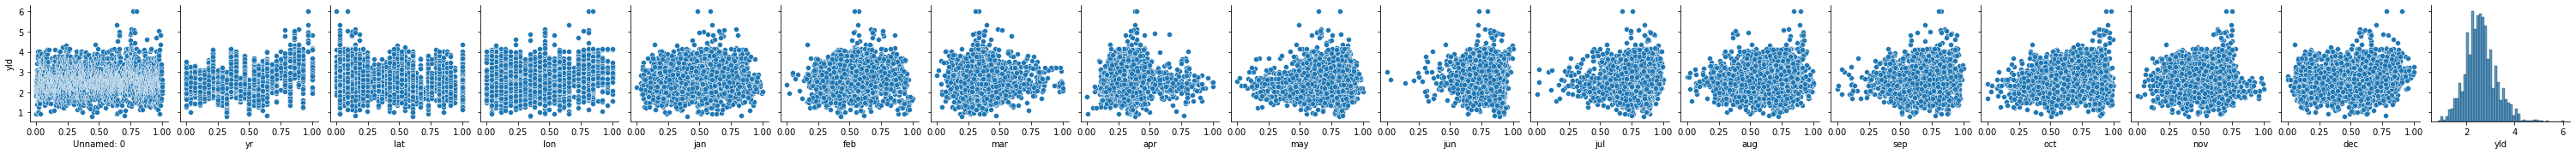

In [9]:
fname = fname6

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- Monthly max msdwuvrf displays behavior reminiscent of that in the monthly mean total precipitation rate: in certain months, there is a noticeable change in the range of yields as the max msdwuvrf changes. For instance, in mar, apr, as monthly max msdwuvrf increases, the range of yields decreases. In may, jun, jul, sep, oct, as max msdwuvrf increases, the range of yields increases. Again, this could be due to a sampling bias, or to some physical phenomenon.

## Visualize yield plotted against monthly min msdwuvrf

monthly_uv_min.xlsx


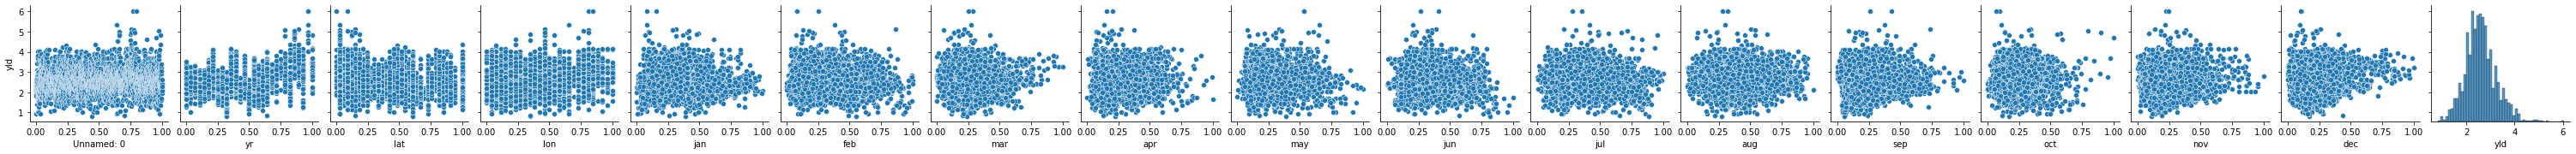

In [10]:
fname = fname7

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- Monthly min msdwuvrf also displays behavior reminiscent of that in the monthly mean total precipitation rate and monthly max msdwuvrf. In jan, mar, sep, nov, dec, as monthly max msdwuvrf increases, the range of yields decreases.

## Visualize yield plotted against monthly mean relative humidity

monthly_rh_mean.xlsx


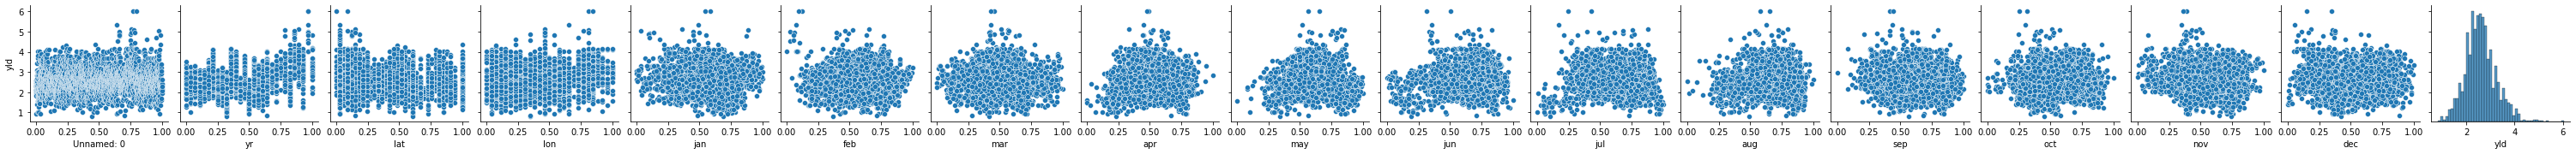

In [11]:
fname = fname15

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- It is very difficult to distinguish a relationship between yield and monthly mean relative humidity here. It seems possible that there is a second degree relationship between yield and some monthly mean rh (maybe apr, may, jun, jul), but it is very hard to tell...

# Inspect yield vs normalized data anomalies

## Visualize yield plotted against mean monthly temp anomaly

monthly_avgt2m_anom.xlsx


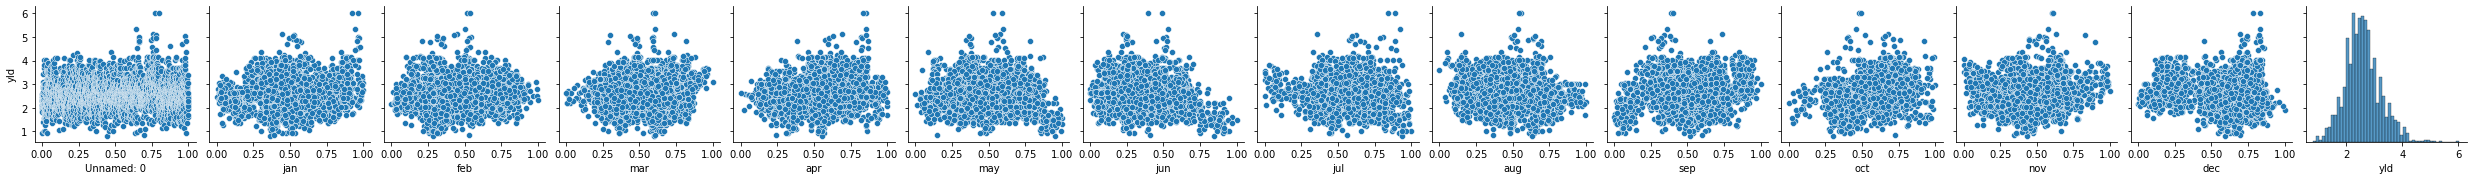

In [12]:
fname = fname8

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- It is difficult to identify a clear relationship between yield and mean monthly temp anomaly for most of the months. The two parameters seem fairly independent.
- There may be a slight negative correlation between yield and jun mean monthly temp anomaly.
- There may be a slight positive correlation between yield and jan, oct mean monthly temp anomaly.

## Visualize yield plotted against max monthly temp anomaly

monthly_maxt2m_anom.xlsx


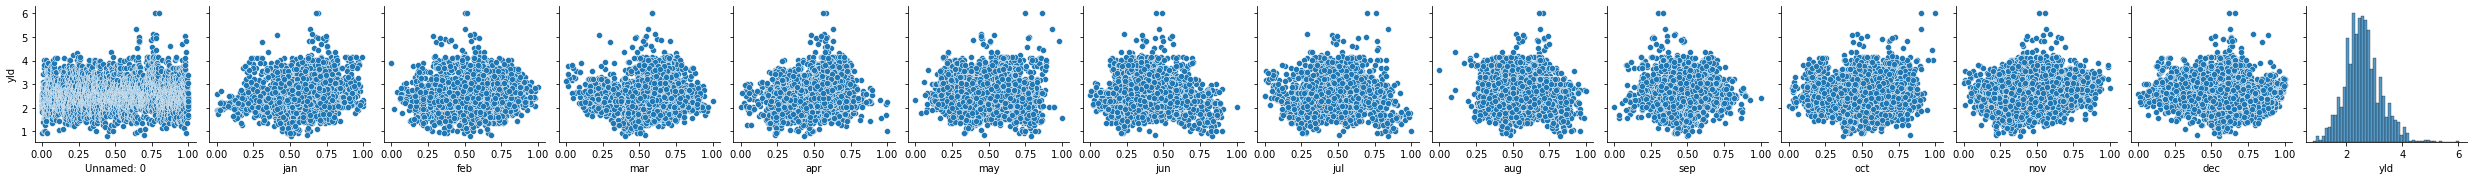

In [13]:
fname = fname9

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- There appears to be a slight positive correlation between yld and apr, oct, nov max monthly temp anomaly.
- There appears to be a slight curvature in the plots of yld and jun, jul, aug max monthly temp anomaly. Physically, this suggests that in summer months there is an optimal intermediary temperature to maximize crop yield. 
    - When I first saw this, I thought it may be indicative of multicollinearity between the monthly mean msdwuvrf and the max monthly temp anomaly. However, the apparent second degree relationship in the plots here occurs in the summer months, whereas for the monthly mean msdwuvrf it occurs in late spring. 

## Visualize yield plotted against min monthly temp anomaly

monthly_mint2m_anom.xlsx


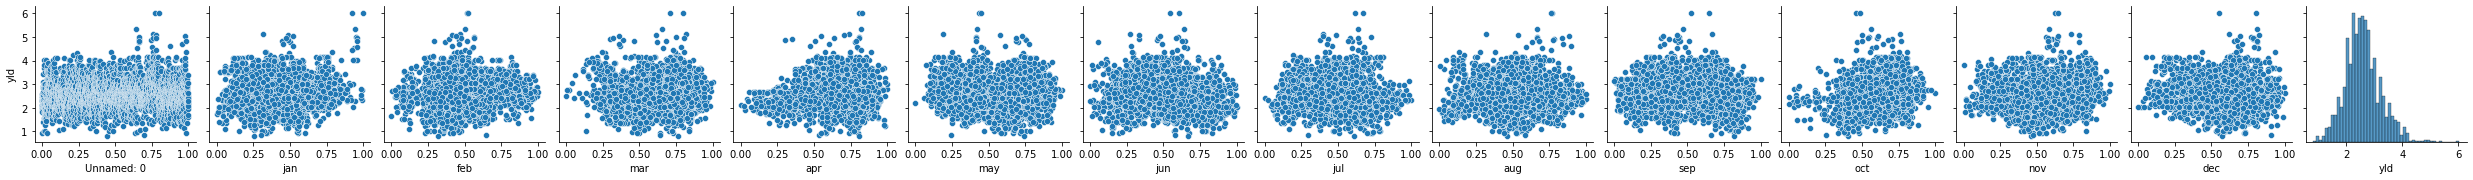

In [14]:
fname = fname10

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- Overall, it seems that the min monthly temp anomaly does not have a substantial effect on yield.
- Yld and jun min monthly temp anomaly appear to have a second degree relationship.
- There appears to be a positive correlation between yld and oct min monthly temp anomaly.

## Visualize yield plotted against monthly mean total precipitation rate anomaly

monthly_precipr_anom.xlsx


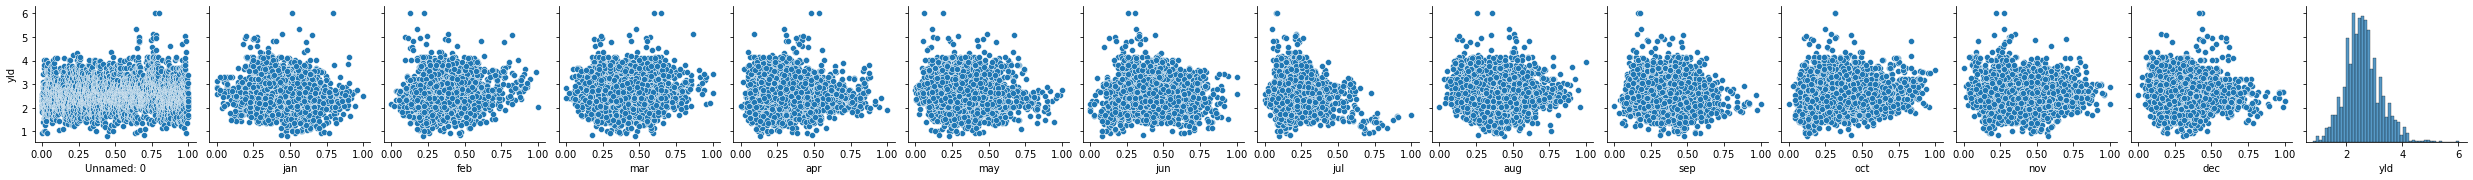

In [15]:
fname = fname11

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- The mean total precipitation anomaly exhibits similar behavior to the mean total precipitation rate: the range of yields tends to decrease with increasing precipitation rate anomaly (see feb, apr, jun, jul, sep, oct, nov, dec).
- However, there is no evident relationship between the magnitude of the yield and the magnitude of the anomaly.

## Visualize yield plotted against monthly mean msdwuvrf anomaly

monthly_uvmean_anom.xlsx


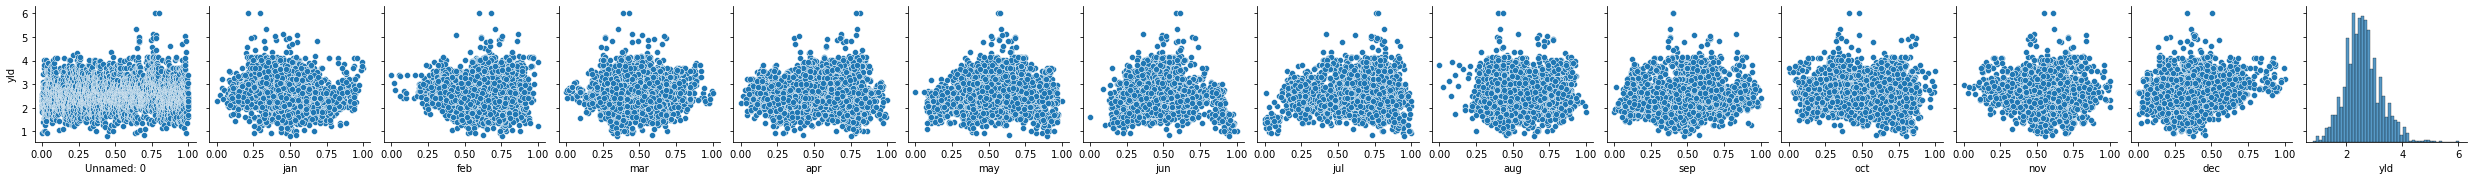

In [16]:
fname = fname12

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- I cannot identify a clear relationship between the magnitude of the yield and the monthly mean msdwuvrf anomaly in most of the months.
- It is possible that may, jun, jul, oct monthly mean msdwuvrf anomaly have a second degree relationship with yield. However, it is pretty messy, and I don't feel super convinced about it.

## Visualize yield plotted against monthly max msdwuvrf anomaly

monthly_uvmax_anom.xlsx


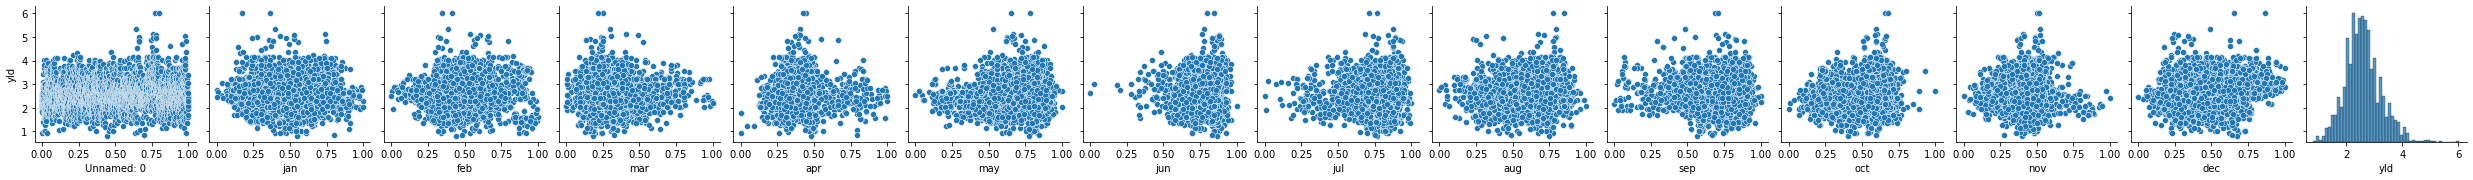

In [17]:
fname = fname13

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

c
- Other than that, I cannot identify any trend between yield and monthly max msdwuvrf anomaly.

## Visualize yield plotted against monthly min msdwuvrf anomaly

monthly_uv_min_anom.xlsx


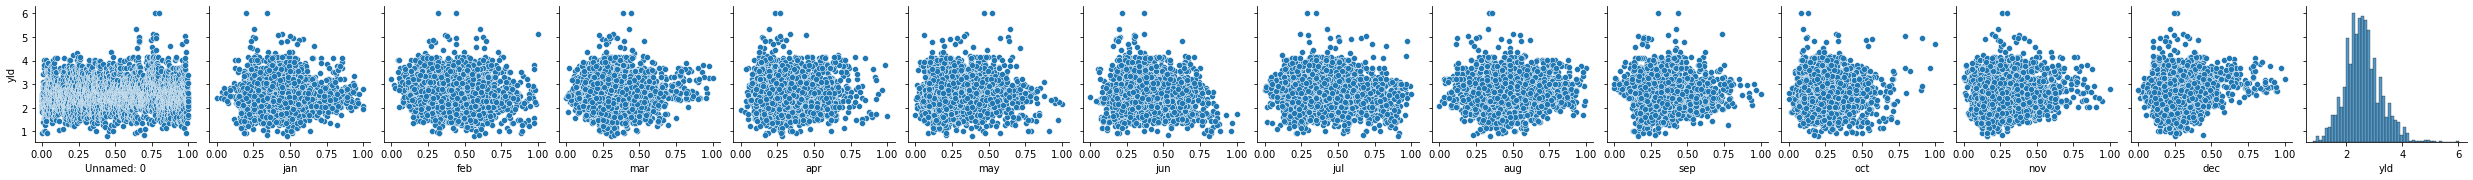

In [18]:
fname = fname14

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- The range of yields appears to be dependent on the magnitude of the monthly max msdwuvrf anomaly for jan, nov, dec.

## Visualize yield plotted against monthly mean relative humidity anomaly

monthly_rh_mean_anom.xlsx


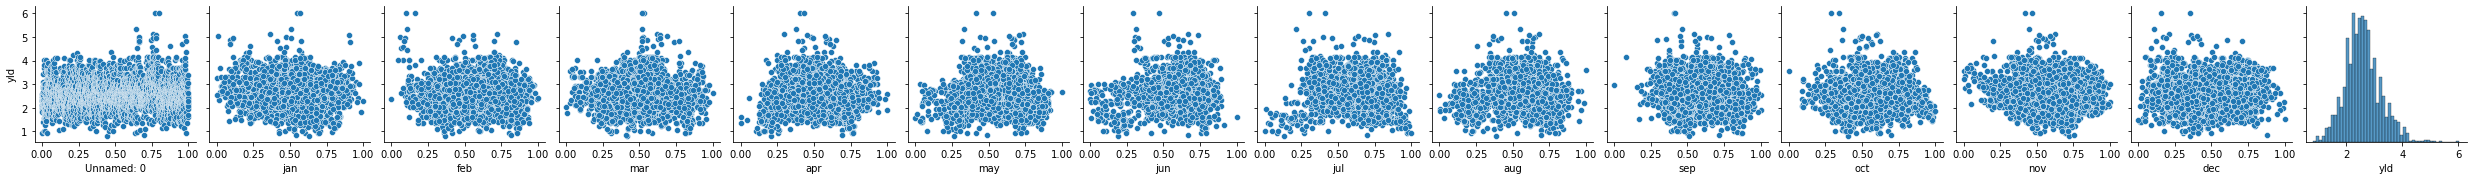

In [19]:
fname = fname16

print(fname)
featpath = featdir + fname
yld_pairplot(yldpath, featpath)

- Like for monthly mean relative humidity, it is difficult to distinguish a relationship between the yield and the anomaly here. 
- There may be a second degree relationship between yields and mean rh anomaly for the summer months, but it is not so clear. 

## Compile relevant features into one dataset


In [20]:
dropcols = ['Unnamed: 0', 'feb', 'mar', 'may', 'jun', 'jul', 'aug', 'sep', 'nov', 'dec']
d1 = pd.read_excel(featdir + fname1).drop(dropcols, axis=1)
d1.rename(columns={'jan': 't2mmean_1', 'apr': 't2mmean_4', 'oct':'t2mmean_10'}, inplace=True)


In [21]:
dropcols = ['Unnamed: 0', 'yr', 'lat', 'lon', 'feb', 'may', 'jun', 'jul', 'aug', 'sep', 'oct']
d2 = pd.read_excel(featdir + fname2).drop(dropcols, axis=1)
d2.rename(columns={'jan': 't2mmax_1','mar':'t2mmax_3','apr': 't2mmax_4', 'nov':'t2mmax_11', 'dec':'t2mmax_12'}, inplace=True)



In [22]:
dropcols = ['Unnamed: 0', 'yr', 'lat', 'lon', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'dec']
d3 = pd.read_excel(featdir + fname3).drop(dropcols, axis=1)
d3.rename(columns={'jan': 't2mmin_1', 'oct':'t2mmin_10', 'nov':'t2mmin_11'}, inplace=True)



In [23]:
dropcols = ['Unnamed: 0', 'yr', 'lat', 'lon', 'jan', 'may', 'jun', 'aug', 'sep', 'nov', 'dec']
d4 = pd.read_excel(featdir + fname4).drop(dropcols, axis=1)
d4.rename(columns={'feb': 'precip_2', 'mar':'precip_3','apr': 'precip_4','jul':'precip_7', 'oct':'precip_10'}, inplace=True)



In [24]:
dropcols = ['Unnamed: 0', 'yr', 'lat', 'lon', 'jan','feb', 'mar', 'aug', 'sep', 'oct', 'nov']
d5 = pd.read_excel(featdir + fname5).drop(dropcols, axis=1)
d5.rename(columns={'apr': 'uvmean_4', 'may': 'uvmean_5', 'jun':'uvmean_6', 'jul':'uvmean_7', 'dec':'uvmean_12'}, inplace=True)



In [25]:
dropcols = ['Unnamed: 0', 'feb', 'mar', 'apr', 'jul', 'aug', 'dec']
d8 = pd.read_excel(featdir + fname8).drop(dropcols, axis=1)
d8.rename(columns={'jan': 't2mmeananom_1', 'may': 't2mmeananom_5', 'jun':'t2mmeananom_6', 'sep':'t2mmeananom_9', 'oct':'t2mmeananom_10', 'nov':'t2mmeananom_11'}, inplace=True)




In [26]:
dropcols = ['Unnamed: 0', 'jan', 'feb', 'mar', 'apr', 'may', 'sep', 'oct', 'dec']
d9 = pd.read_excel(featdir + fname9).drop(dropcols, axis=1)
d9.rename(columns={'jun': 't2mmaxanom_6', 'jul': 't2mmaxanom_7', 'aug':'t2mmaxanom_8', 'nov':'t2mmaxanom_11'}, inplace=True)




In [27]:
dropcols = ['Unnamed: 0', 'jan', 'feb', 'mar', 'apr', 'jul', 'aug', 'sep', 'nov', 'dec']
d10 = pd.read_excel(featdir + fname10).drop(dropcols, axis=1)
d10.rename(columns={'may': 't2mminanom_5', 'jun': 't2mminanom_6', 'oct':'t2mminanom_10'}, inplace=True)



In [28]:
dropcols = ['Unnamed: 0', 'jan', 'mar', 'apr', 'aug', 'sep', 'nov']
d11 = pd.read_excel(featdir + fname11).drop(dropcols, axis=1)
d11.rename(columns={'feb': 'precipanom_2', 'may': 'precipanom_5', 'jun':'precipanom_6', 'jul':'precipanom_7', 'oct':'precipanom_10', 'dec':'precipanom_12'}, inplace=True)



In [29]:
dropcols = ['Unnamed: 0', 'jan', 'feb', 'aug', 'sep', 'nov']
d12 = pd.read_excel(featdir + fname12).drop(dropcols, axis=1)
d12.rename(columns={'mar': 'uvmeananom_3', 'apr': 'uvmeananom_4','may':'uvmeananom_5', 'jun':'uvmeananom_6', 'jul':'uvmeananom_6', 'oct':'uvmeananom_10', 'dec':'uvmeananom_12'}, inplace=True)



In [30]:
dropcols = ['Unnamed: 0', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'oct']
d14 = pd.read_excel(featdir + fname14).drop(dropcols, axis=1)
d14.rename(columns={'aug': 'uvminanom_8', 'sep': 'uvminanom_9', 'nov':'uvmeananom_11', 'dec':'uvminanom_12'}, inplace=True)



In [31]:
dropcols = ['Unnamed: 0', 'lat', 'lon', 'yr', 'jan', 'feb', 'mar', 'aug', 'sep', 'oct', 'dec']
d15 = pd.read_excel(featdir + fname15).drop(dropcols, axis=1)
d15.rename(columns={'apr': 'rh_4', 'may': 'rh_5', 'jun':'rh_6', 'jul':'rh_7', 'nov':'rh_11'}, inplace=True)



In [32]:
dropcols = ['Unnamed: 0','feb', 'mar', 'apr', 'sep', 'oct', 'dec']
d16 = pd.read_excel(featdir + fname16).drop(dropcols, axis=1)
d16.rename(columns={'jan': 'rhanom_1', 'may': 'rhanom_5', 'jun':'rhanom_6', 'jul':'rhanom_7', 'aug':'rhanom_8', 'nov':'rhanom_11'}, inplace=True)


In [33]:
finalfeat = pd.concat([d1, d2, d3, d4, d5, d8, d9, d10, d11, d12, d14, d15, d16], axis=1)

In [34]:
finalfeat.to_excel('/Users/demetrayancopoulos/Desktop/SML310/final_project/finalfeat_indexed.xlsx')

